# 1. Imports

In [5]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import cv2

# 2. Data fetching

### 2.1 Folder structure

In [13]:
if not os.path.exists(r"./Data"):
    os.makedirs(r"./Data")
    os.makedirs(r"./Data/Train_Data")
    os.makedirs(r"./Data/Train_Data/Class_0")
    os.makedirs(r"./Data/Train_Data/Class_1")
    os.makedirs(r"./Data/Test_Data")
    os.makedirs(r"./Data/Test_Data/Class_0")
    os.makedirs(r"./Data/Test_Data/Class_1")
    os.makedirs(r"./Data/Val_Data")
    os.makedirs(r"./Data/Val_Data/Class_0")
    os.makedirs(r"./Data/Val_Data/Class_1")
    print("Folder structure created successfully!")

else:
    print("Folder already exists!")

Folder already exists!


### 2.2 Data collection

In [14]:
"""url = 'http://192.0.0.4:8080//video'

cap = cv2.VideoCapture(url)

if not cap.isOpened():
    print("Error: Could not connect to the IP webcam.")
    exit()

window_name = "IP Webcam Feed"
capture_frames = False
frame_count = 0

train_path = "./Data/Train_Data"
class_0_path = os.path.join(train_path, "Class_0")
class_1_path = os.path.join(train_path, "Class_1")

while True:
    ret, frame = cap.read()

    if ret:
        cv2.imshow(window_name, frame)

        if capture_frames:
            frame_count += 1
            if capture_mode == 'a':
                save_path = os.path.join(class_0_path, f"captured_frame_{frame_count}.png")
            elif capture_mode == 'b':
                save_path = os.path.join(class_1_path, f"captured_frame_{frame_count}.png")

            cv2.imwrite(save_path, frame)
            print(f"Frame {frame_count} captured and saved to {save_path}")

    key = cv2.waitKey(1)

    if key == ord('q'):
        break
    elif key == ord('a'):
        capture_frames = not capture_frames
        capture_mode = 'a'
    elif key == ord('b'):
        capture_frames = not capture_frames
        capture_mode = 'b'
    elif key == -1:
        capture_frames = False

cap.release()
cv2.destroyAllWindows()"""

'url = \'http://192.0.0.4:8080//video\'\n\ncap = cv2.VideoCapture(url)\n\nif not cap.isOpened():\n    print("Error: Could not connect to the IP webcam.")\n    exit()\n\nwindow_name = "IP Webcam Feed"\ncapture_frames = False\nframe_count = 0\n\ntrain_path = "./Data/Train_Data"\nclass_0_path = os.path.join(train_path, "Class_0")\nclass_1_path = os.path.join(train_path, "Class_1")\n\nwhile True:\n    ret, frame = cap.read()\n\n    if ret:\n        cv2.imshow(window_name, frame)\n\n        if capture_frames:\n            frame_count += 1\n            if capture_mode == \'a\':\n                save_path = os.path.join(class_0_path, f"captured_frame_{frame_count}.png")\n            elif capture_mode == \'b\':\n                save_path = os.path.join(class_1_path, f"captured_frame_{frame_count}.png")\n\n            cv2.imwrite(save_path, frame)\n            print(f"Frame {frame_count} captured and saved to {save_path}")\n\n    key = cv2.waitKey(1)\n\n    if key == ord(\'q\'):\n        break\

### 2.3 Train, Test and Validation Split

In [15]:
"""data_folder = "./Data"
train_data_folder = os.path.join(data_folder, "Train_Data")
test_data_folder = os.path.join(data_folder, "Test_Data")
val_data_folder = os.path.join(data_folder, "Val_Data")

test_percentage = 15
val_percentage = 15

class0_images = []
class1_images = []

class0_folder_path = os.path.join(train_data_folder, "Class_0")
class0_images = [f for f in os.listdir(class0_folder_path) if os.path.isfile(os.path.join(class0_folder_path, f))]

class1_folder_path = os.path.join(train_data_folder, "Class_1")
class1_images = [f for f in os.listdir(class1_folder_path) if os.path.isfile(os.path.join(class1_folder_path, f))]

test_images_set = set()

num_test_images_class0 = int(len(class0_images) * (test_percentage / 100))
num_test_images_class1 = int(len(class1_images) * (test_percentage / 100))

test_images_class0 = random.sample(class0_images, num_test_images_class0)
test_images_set.update(test_images_class0)

test_images_class1 = random.sample(class1_images, num_test_images_class1)
test_images_set.update(test_images_class1)

for image in test_images_class0:
    src_path = os.path.join(class0_folder_path, image)
    dest_path = os.path.join(test_data_folder, "Class_0", image)
    shutil.move(src_path, dest_path)

for image in test_images_class1:
    src_path = os.path.join(class1_folder_path, image)
    dest_path = os.path.join(test_data_folder, "Class_1", image)
    shutil.move(src_path, dest_path)

num_val_images_class0 = int(len(class0_images) * (val_percentage / 100))
num_val_images_class1 = int(len(class1_images) * (val_percentage / 100))

remaining_val_images_class0 = set(class0_images) - test_images_set
remaining_val_images_class1 = set(class1_images) - test_images_set

num_val_images_class0 = min(num_val_images_class0, len(remaining_val_images_class0))
num_val_images_class1 = min(num_val_images_class1, len(remaining_val_images_class1))

val_images_class0 = random.sample(remaining_val_images_class0, num_val_images_class0)
for image in val_images_class0:
    src_path = os.path.join(class0_folder_path, image)
    dest_path = os.path.join(val_data_folder, "Class_0", image)
    shutil.move(src_path, dest_path)

val_images_class1 = random.sample(remaining_val_images_class1, num_val_images_class1)
for image in val_images_class1:
    src_path = os.path.join(class1_folder_path, image)
    dest_path = os.path.join(val_data_folder, "Class_1", image)
    shutil.move(src_path, dest_path)

print("Data splited successfully.")"""

'data_folder = "./Data"\ntrain_data_folder = os.path.join(data_folder, "Train_Data")\ntest_data_folder = os.path.join(data_folder, "Test_Data")\nval_data_folder = os.path.join(data_folder, "Val_Data")\n\ntest_percentage = 15\nval_percentage = 15\n\nclass0_images = []\nclass1_images = []\n\nclass0_folder_path = os.path.join(train_data_folder, "Class_0")\nclass0_images = [f for f in os.listdir(class0_folder_path) if os.path.isfile(os.path.join(class0_folder_path, f))]\n\nclass1_folder_path = os.path.join(train_data_folder, "Class_1")\nclass1_images = [f for f in os.listdir(class1_folder_path) if os.path.isfile(os.path.join(class1_folder_path, f))]\n\ntest_images_set = set()\n\nnum_test_images_class0 = int(len(class0_images) * (test_percentage / 100))\nnum_test_images_class1 = int(len(class1_images) * (test_percentage / 100))\n\ntest_images_class0 = random.sample(class0_images, num_test_images_class0)\ntest_images_set.update(test_images_class0)\n\ntest_images_class1 = random.sample(class1

# 3. Data preprocessing

In [16]:
data_folder = "./Data"
train_data_folder = os.path.join(data_folder, "Train_Data")
test_data_folder = os.path.join(data_folder, "Test_Data")
val_data_folder = os.path.join(data_folder, "Val_Data")

# Create ImageDataGenerator instances for training, testing and validation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up generators for training, testing and validation data
train_generator = train_datagen.flow_from_directory(
        train_data_folder,
        target_size=(320, 180),
        batch_size=32,
        class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
        val_data_folder,
        target_size=(320, 180),
        batch_size=32,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_data_folder,
    target_size=(320, 180),
    batch_size=32,
    class_mode='binary'
)

Found 3360 images belonging to 2 classes.
Found 720 images belonging to 2 classes.
Found 720 images belonging to 2 classes.


# 4. Deep learning model 

### 4.1 Model building

In [17]:
# CNN Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(320, 180, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


# Early stopping and model check point
es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 3, verbose= 1, mode = 'auto')
mc = ModelCheckpoint(monitor="val_accuracy",filepath="./conveyor_model_2.h5", verbose= 1 , save_best_only= True , mode = 'auto')
cd = [es,mc]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 89, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 87, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 20, 128)      0

### 4.2 Model compilation

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 4.3 Model training

In [1]:
history1 = model.fit(
    train_generator,
    steps_per_epoch=52,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=16,
    verbose=1,
    callbacks=cd
)

NameError: name 'model' is not defined

### 4.4 Model visualization

In [20]:
# Model Graphical Interpretation
h = history1.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

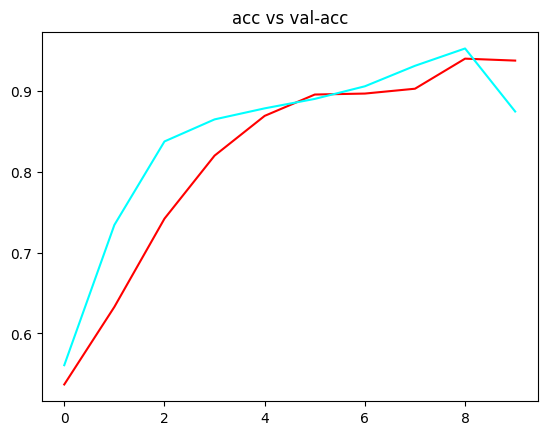

In [21]:
# Accuracy vs Validation accuracy
plt.plot(h['accuracy'],c="red")
plt.plot(h['val_accuracy'],c="cyan")
plt.title("acc vs val-acc")
plt.show()

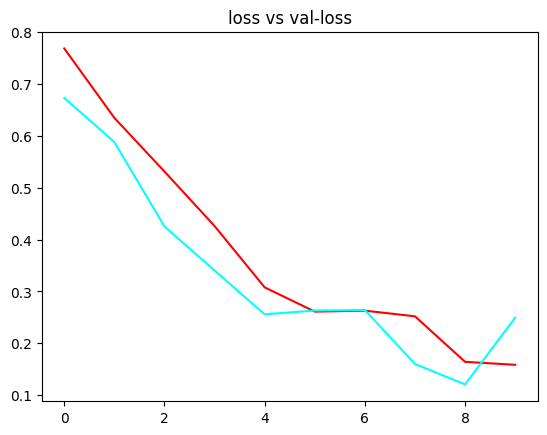

In [22]:
# Loss vs Validation loss
plt.plot(h['loss'],c="red")
plt.plot(h['val_loss'],c="cyan")
plt.title("loss vs val-loss")
plt.show()

# 5. Model evaluation

### 5.1 Loading model 

In [23]:
model = load_model("./conveyor_model.h5")

# Prediction on test data
acc = model.evaluate(test_generator)[1]

print("The accuracy of the model is ",acc*100,"%")

23/23 [==============================] - 18s 796ms/step - loss: 0.0603 - accuracy: 0.9806
The accuracy of the model is  98.0555534362793 %


### 5.2 Image prediction

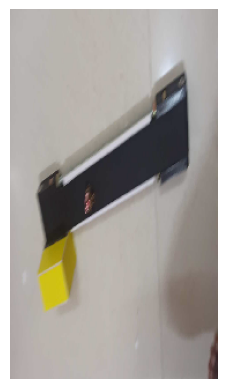

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Defect is not detected


In [9]:
model = load_model("./conveyor_model.h5")

img_path = r"Pseudo\Class_0\captured_frame_2.png"
img = image.load_img(img_path, target_size=(320, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

plt.imshow(img)
plt.axis('off')
plt.show()

predictions = model.predict(img_array)

if predictions > 0.5:
    print("Defect is detected")
else:
    print("Defect is not detected")

### 5.3 Video prediction

In [6]:
model = load_model("./conveyor_model.h5")

input_video_path = r"C:\Users\asus\OneDrive\Desktop\Conveyor_Belt\sample4.mp4"
output_video_path = r"C:\Users\asus\Downloads\output4.mp4"

cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

for _ in tqdm(range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))):
    ret, frame = cap.read()

    if not ret:
        break

    img = cv2.resize(frame, (180, 320))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)

    result_text = "Defect Detected" if predictions > 0.5 else "Defect Not Detected"
    cv2.putText(frame, result_text, (10, height - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

c:\Users\asus\miniconda3\envs\Py_3.10_Env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\asus\miniconda3\envs\Py_3.10_Env\lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
  0%|          | 0/1061 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  0%|          | 1/1061 [00:00<12:00,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  0%|          | 2/1061 [00:01<09:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 3/1061 [00:01<08:34,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  0%|          | 4/1061 [00:01<08:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  0%|          | 5/1061 [00:02<07:22,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  1%|          | 6/1061 [00:02<06:46,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|          | 7/1061 [00:02<06:38,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 8/1061 [00:03<06:35,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 9/1061 [00:03<07:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  1%|          | 10/1061 [00:04<06:52,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 11/1061 [00:04<06:34,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  1%|          | 12/1061 [00:04<06:25,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 13/1061 [00:05<06:19,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  1%|▏         | 14/1061 [00:05<06:15,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|▏         | 15/1061 [00:05<06:20,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  2%|▏         | 16/1061 [00:06<06:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  2%|▏         | 17/1061 [00:06<06:21,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  2%|▏         | 18/1061 [00:07<07:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  2%|▏         | 19/1061 [00:07<07:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  2%|▏         | 20/1061 [00:08<07:19,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  2%|▏         | 21/1061 [00:08<06:44,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  2%|▏         | 22/1061 [00:08<06:29,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  2%|▏         | 23/1061 [00:09<06:18,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  2%|▏         | 24/1061 [00:09<06:11,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 25/1061 [00:09<06:11,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 26/1061 [00:10<06:26,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  3%|▎         | 27/1061 [00:10<06:53,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  3%|▎         | 28/1061 [00:11<06:45,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  3%|▎         | 29/1061 [00:11<06:46,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  3%|▎         | 30/1061 [00:11<06:43,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  3%|▎         | 31/1061 [00:12<06:34,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  3%|▎         | 32/1061 [00:12<06:21,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  3%|▎         | 33/1061 [00:12<06:02,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  3%|▎         | 34/1061 [00:13<05:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  3%|▎         | 35/1061 [00:13<06:12,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  3%|▎         | 36/1061 [00:14<07:03,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  3%|▎         | 37/1061 [00:14<06:49,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  4%|▎         | 38/1061 [00:14<06:33,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▎         | 39/1061 [00:15<06:27,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  4%|▍         | 40/1061 [00:15<06:30,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  4%|▍         | 41/1061 [00:15<06:33,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  4%|▍         | 42/1061 [00:16<06:26,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▍         | 43/1061 [00:16<06:20,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  4%|▍         | 44/1061 [00:17<06:20,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  4%|▍         | 45/1061 [00:17<06:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  4%|▍         | 46/1061 [00:17<06:54,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▍         | 47/1061 [00:18<06:40,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▍         | 48/1061 [00:18<06:22,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▍         | 49/1061 [00:19<06:13,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  5%|▍         | 50/1061 [00:19<05:59,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  5%|▍         | 51/1061 [00:19<05:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  5%|▍         | 52/1061 [00:20<06:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  5%|▍         | 53/1061 [00:20<07:03,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  5%|▌         | 54/1061 [00:21<06:43,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  5%|▌         | 55/1061 [00:21<06:36,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  5%|▌         | 56/1061 [00:21<06:20,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  5%|▌         | 57/1061 [00:22<07:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  5%|▌         | 58/1061 [00:22<07:00,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  6%|▌         | 59/1061 [00:23<06:46,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 60/1061 [00:23<06:21,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  6%|▌         | 61/1061 [00:23<06:43,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  6%|▌         | 62/1061 [00:24<06:43,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  6%|▌         | 63/1061 [00:24<06:41,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  6%|▌         | 64/1061 [00:25<06:41,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  6%|▌         | 65/1061 [00:25<06:18,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  6%|▌         | 66/1061 [00:25<06:13,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  6%|▋         | 67/1061 [00:26<06:14,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  6%|▋         | 68/1061 [00:26<06:07,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  7%|▋         | 69/1061 [00:27<07:31,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  7%|▋         | 70/1061 [00:27<07:02,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  7%|▋         | 71/1061 [00:27<06:48,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|▋         | 72/1061 [00:28<06:38,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 73/1061 [00:28<06:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  7%|▋         | 74/1061 [00:29<06:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  7%|▋         | 75/1061 [00:29<06:38,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  7%|▋         | 76/1061 [00:29<06:19,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 77/1061 [00:30<06:50,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  7%|▋         | 78/1061 [00:30<06:46,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  7%|▋         | 79/1061 [00:31<06:59,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  8%|▊         | 80/1061 [00:31<07:05,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 81/1061 [00:31<06:32,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|▊         | 82/1061 [00:32<06:11,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  8%|▊         | 83/1061 [00:32<05:55,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  8%|▊         | 84/1061 [00:32<05:51,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 85/1061 [00:33<06:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  8%|▊         | 86/1061 [00:33<06:18,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 87/1061 [00:34<05:58,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  8%|▊         | 88/1061 [00:34<05:49,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 89/1061 [00:34<05:44,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  8%|▊         | 90/1061 [00:35<05:59,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  9%|▊         | 91/1061 [00:35<06:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▊         | 92/1061 [00:35<06:07,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 93/1061 [00:36<06:27,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 94/1061 [00:36<06:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  9%|▉         | 95/1061 [00:37<05:57,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  9%|▉         | 96/1061 [00:37<05:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  9%|▉         | 97/1061 [00:37<05:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▉         | 98/1061 [00:38<05:54,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  9%|▉         | 99/1061 [00:38<05:38,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  9%|▉         | 100/1061 [00:38<05:27,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 10%|▉         | 101/1061 [00:39<06:13,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 10%|▉         | 102/1061 [00:39<06:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 10%|▉         | 103/1061 [00:40<06:12,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 10%|▉         | 104/1061 [00:40<05:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|▉         | 105/1061 [00:40<05:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 10%|▉         | 106/1061 [00:41<06:37,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 10%|█         | 107/1061 [00:41<07:00,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|█         | 108/1061 [00:42<06:45,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 10%|█         | 109/1061 [00:42<06:54,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|█         | 110/1061 [00:43<06:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|█         | 111/1061 [00:43<06:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 11%|█         | 112/1061 [00:43<06:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 11%|█         | 113/1061 [00:44<06:51,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 11%|█         | 114/1061 [00:44<06:39,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█         | 115/1061 [00:45<06:23,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 11%|█         | 116/1061 [00:45<06:21,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 11%|█         | 117/1061 [00:46<07:07,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█         | 118/1061 [00:46<06:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 11%|█         | 119/1061 [00:46<06:31,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 11%|█▏        | 120/1061 [00:47<06:19,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 11%|█▏        | 121/1061 [00:47<06:08,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 11%|█▏        | 122/1061 [00:47<06:07,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 12%|█▏        | 123/1061 [00:48<06:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 12%|█▏        | 124/1061 [00:48<06:24,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 12%|█▏        | 125/1061 [00:49<06:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 12%|█▏        | 126/1061 [00:49<06:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 12%|█▏        | 127/1061 [00:50<06:12,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 12%|█▏        | 128/1061 [00:50<06:14,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 12%|█▏        | 129/1061 [00:50<06:14,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 12%|█▏        | 130/1061 [00:51<06:19,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 12%|█▏        | 131/1061 [00:51<06:09,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 12%|█▏        | 132/1061 [00:52<06:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 13%|█▎        | 133/1061 [00:52<06:56,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 13%|█▎        | 134/1061 [00:52<06:33,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 13%|█▎        | 135/1061 [00:53<06:13,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 13%|█▎        | 136/1061 [00:53<05:48,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 13%|█▎        | 137/1061 [00:54<05:39,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 13%|█▎        | 138/1061 [00:54<05:49,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 13%|█▎        | 139/1061 [00:54<05:45,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 13%|█▎        | 140/1061 [00:55<05:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 13%|█▎        | 141/1061 [00:55<06:17,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 13%|█▎        | 142/1061 [00:55<05:55,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 13%|█▎        | 143/1061 [00:56<06:00,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 14%|█▎        | 144/1061 [00:56<06:01,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 14%|█▎        | 145/1061 [00:57<05:58,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 14%|█▍        | 146/1061 [00:57<05:41,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 14%|█▍        | 147/1061 [00:57<05:34,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 14%|█▍        | 148/1061 [00:58<05:47,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 14%|█▍        | 149/1061 [00:58<06:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 14%|█▍        | 150/1061 [00:59<06:18,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 14%|█▍        | 151/1061 [00:59<06:03,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 14%|█▍        | 152/1061 [00:59<05:39,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 14%|█▍        | 153/1061 [01:00<05:35,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 15%|█▍        | 154/1061 [01:00<05:26,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▍        | 155/1061 [01:00<05:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 15%|█▍        | 156/1061 [01:01<05:47,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 15%|█▍        | 157/1061 [01:01<06:24,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 15%|█▍        | 158/1061 [01:02<06:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 15%|█▍        | 159/1061 [01:02<05:52,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 15%|█▌        | 160/1061 [01:03<05:53,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 15%|█▌        | 161/1061 [01:03<05:56,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 15%|█▌        | 162/1061 [01:03<05:45,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 15%|█▌        | 163/1061 [01:04<05:48,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 15%|█▌        | 164/1061 [01:04<05:39,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 16%|█▌        | 165/1061 [01:05<06:26,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 16%|█▌        | 166/1061 [01:05<06:16,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 16%|█▌        | 167/1061 [01:05<06:01,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 16%|█▌        | 168/1061 [01:06<05:48,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 16%|█▌        | 169/1061 [01:06<05:33,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 16%|█▌        | 170/1061 [01:06<05:40,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 16%|█▌        | 171/1061 [01:07<05:49,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 16%|█▌        | 172/1061 [01:07<05:43,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 16%|█▋        | 173/1061 [01:08<06:12,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 16%|█▋        | 174/1061 [01:08<05:48,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 16%|█▋        | 175/1061 [01:08<05:56,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 17%|█▋        | 176/1061 [01:09<06:04,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 177/1061 [01:09<05:52,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 17%|█▋        | 178/1061 [01:10<05:38,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 17%|█▋        | 179/1061 [01:10<05:23,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 17%|█▋        | 180/1061 [01:10<05:57,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 181/1061 [01:11<05:45,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 17%|█▋        | 182/1061 [01:11<05:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 183/1061 [01:12<05:37,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 17%|█▋        | 184/1061 [01:12<05:31,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 17%|█▋        | 185/1061 [01:12<05:30,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 18%|█▊        | 186/1061 [01:13<05:34,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 187/1061 [01:13<05:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 18%|█▊        | 188/1061 [01:14<06:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 18%|█▊        | 189/1061 [01:14<05:45,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 18%|█▊        | 190/1061 [01:14<05:28,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 18%|█▊        | 191/1061 [01:15<05:31,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 18%|█▊        | 192/1061 [01:15<05:40,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 18%|█▊        | 193/1061 [01:15<05:42,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 18%|█▊        | 194/1061 [01:16<05:41,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 18%|█▊        | 195/1061 [01:16<05:22,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 18%|█▊        | 196/1061 [01:17<05:14,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 19%|█▊        | 197/1061 [01:17<06:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▊        | 198/1061 [01:18<06:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 19%|█▉        | 199/1061 [01:18<06:12,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 19%|█▉        | 200/1061 [01:18<05:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 19%|█▉        | 201/1061 [01:19<05:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 19%|█▉        | 202/1061 [01:19<06:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 19%|█▉        | 203/1061 [01:20<05:57,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 204/1061 [01:20<05:32,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 19%|█▉        | 205/1061 [01:21<06:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 19%|█▉        | 206/1061 [01:21<05:39,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 20%|█▉        | 207/1061 [01:21<05:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 20%|█▉        | 208/1061 [01:22<05:36,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 20%|█▉        | 209/1061 [01:22<05:38,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 20%|█▉        | 210/1061 [01:22<05:42,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 20%|█▉        | 211/1061 [01:23<05:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 20%|█▉        | 212/1061 [01:23<06:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 20%|██        | 213/1061 [01:24<06:00,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 20%|██        | 214/1061 [01:24<05:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 20%|██        | 215/1061 [01:24<05:27,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 20%|██        | 216/1061 [01:25<05:14,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 20%|██        | 217/1061 [01:25<05:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 21%|██        | 218/1061 [01:26<05:06,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 21%|██        | 219/1061 [01:26<05:38,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 21%|██        | 220/1061 [01:27<06:33,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 21%|██        | 221/1061 [01:27<06:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 21%|██        | 222/1061 [01:28<06:29,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 21%|██        | 223/1061 [01:28<06:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 21%|██        | 224/1061 [01:28<05:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 21%|██        | 225/1061 [01:29<05:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 21%|██▏       | 226/1061 [01:29<05:26,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 21%|██▏       | 227/1061 [01:29<05:24,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 21%|██▏       | 228/1061 [01:30<05:24,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 22%|██▏       | 229/1061 [01:30<05:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 230/1061 [01:31<05:29,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 22%|██▏       | 231/1061 [01:31<05:20,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 22%|██▏       | 232/1061 [01:31<04:58,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 22%|██▏       | 233/1061 [01:32<05:07,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 22%|██▏       | 234/1061 [01:32<05:51,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 235/1061 [01:33<05:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 22%|██▏       | 236/1061 [01:33<05:26,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 22%|██▏       | 237/1061 [01:33<05:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 22%|██▏       | 238/1061 [01:34<05:43,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 23%|██▎       | 239/1061 [01:34<05:38,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 23%|██▎       | 240/1061 [01:35<05:29,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 23%|██▎       | 241/1061 [01:35<05:11,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 23%|██▎       | 242/1061 [01:35<05:07,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 23%|██▎       | 243/1061 [01:36<05:12,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 244/1061 [01:36<05:16,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 23%|██▎       | 245/1061 [01:37<05:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 246/1061 [01:37<05:31,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 23%|██▎       | 247/1061 [01:37<05:21,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 248/1061 [01:38<07:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 23%|██▎       | 249/1061 [01:39<06:57,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 24%|██▎       | 250/1061 [01:39<06:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 24%|██▎       | 251/1061 [01:39<05:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 24%|██▍       | 252/1061 [01:40<05:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▍       | 253/1061 [01:40<05:15,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 24%|██▍       | 254/1061 [01:40<04:57,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 24%|██▍       | 255/1061 [01:41<04:40,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 256/1061 [01:41<04:15,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 257/1061 [01:41<03:55,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 24%|██▍       | 258/1061 [01:41<03:43,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 24%|██▍       | 259/1061 [01:42<04:06,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 25%|██▍       | 260/1061 [01:42<04:09,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▍       | 261/1061 [01:42<04:16,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 25%|██▍       | 262/1061 [01:43<04:09,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|██▍       | 263/1061 [01:43<03:59,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 25%|██▍       | 264/1061 [01:43<03:53,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 25%|██▍       | 265/1061 [01:44<03:54,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 25%|██▌       | 266/1061 [01:44<04:02,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 25%|██▌       | 267/1061 [01:44<04:36,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 25%|██▌       | 268/1061 [01:45<04:26,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 25%|██▌       | 269/1061 [01:45<04:07,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 270/1061 [01:45<03:56,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 26%|██▌       | 271/1061 [01:46<03:53,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 26%|██▌       | 272/1061 [01:46<03:59,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 26%|██▌       | 273/1061 [01:46<04:10,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 26%|██▌       | 274/1061 [01:47<04:09,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 26%|██▌       | 275/1061 [01:47<04:18,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 26%|██▌       | 276/1061 [01:47<04:08,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 26%|██▌       | 277/1061 [01:48<04:13,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 26%|██▌       | 278/1061 [01:48<04:25,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 26%|██▋       | 279/1061 [01:48<04:31,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 26%|██▋       | 280/1061 [01:49<04:41,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 26%|██▋       | 281/1061 [01:49<04:24,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 27%|██▋       | 282/1061 [01:49<04:11,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 283/1061 [01:50<04:51,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 27%|██▋       | 284/1061 [01:50<04:39,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 27%|██▋       | 285/1061 [01:50<04:27,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 27%|██▋       | 286/1061 [01:51<04:16,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 27%|██▋       | 287/1061 [01:51<04:19,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 27%|██▋       | 288/1061 [01:51<04:24,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 27%|██▋       | 289/1061 [01:52<04:38,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 27%|██▋       | 290/1061 [01:52<04:57,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 27%|██▋       | 291/1061 [01:53<04:50,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 28%|██▊       | 292/1061 [01:53<04:41,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 28%|██▊       | 293/1061 [01:53<04:40,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 28%|██▊       | 294/1061 [01:54<04:57,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 28%|██▊       | 295/1061 [01:54<05:11,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 28%|██▊       | 296/1061 [01:55<05:25,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██▊       | 297/1061 [01:55<05:30,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 28%|██▊       | 298/1061 [01:56<06:15,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 28%|██▊       | 299/1061 [01:56<06:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 28%|██▊       | 300/1061 [01:57<06:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 28%|██▊       | 301/1061 [01:57<05:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 28%|██▊       | 302/1061 [01:57<05:31,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 29%|██▊       | 303/1061 [01:58<05:12,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 29%|██▊       | 304/1061 [01:58<05:01,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 29%|██▊       | 305/1061 [01:59<05:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 29%|██▉       | 306/1061 [01:59<05:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 29%|██▉       | 307/1061 [02:00<05:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 29%|██▉       | 308/1061 [02:00<05:34,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 29%|██▉       | 309/1061 [02:01<05:34,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 29%|██▉       | 310/1061 [02:01<05:34,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 29%|██▉       | 311/1061 [02:02<05:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 29%|██▉       | 312/1061 [02:02<06:30,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 30%|██▉       | 313/1061 [02:03<05:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 30%|██▉       | 314/1061 [02:03<05:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 30%|██▉       | 315/1061 [02:03<05:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 30%|██▉       | 316/1061 [02:04<04:53,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 30%|██▉       | 317/1061 [02:04<05:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 30%|██▉       | 318/1061 [02:05<05:10,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 30%|███       | 319/1061 [02:05<05:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 30%|███       | 320/1061 [02:06<05:41,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 30%|███       | 321/1061 [02:06<05:38,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 30%|███       | 322/1061 [02:06<05:24,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 30%|███       | 323/1061 [02:07<04:57,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 31%|███       | 324/1061 [02:07<04:32,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 31%|███       | 325/1061 [02:07<04:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 31%|███       | 326/1061 [02:08<04:30,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 31%|███       | 327/1061 [02:08<04:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 31%|███       | 328/1061 [02:08<04:02,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███       | 329/1061 [02:09<03:47,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 31%|███       | 330/1061 [02:09<03:35,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 31%|███       | 331/1061 [02:09<03:26,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 31%|███▏      | 332/1061 [02:09<03:29,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 31%|███▏      | 333/1061 [02:10<04:05,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 31%|███▏      | 334/1061 [02:10<04:03,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 32%|███▏      | 335/1061 [02:10<03:59,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 32%|███▏      | 336/1061 [02:11<03:45,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 337/1061 [02:11<03:35,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 32%|███▏      | 338/1061 [02:11<03:28,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 32%|███▏      | 339/1061 [02:12<03:33,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 32%|███▏      | 340/1061 [02:12<04:00,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 32%|███▏      | 341/1061 [02:12<04:02,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 342/1061 [02:13<03:51,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 32%|███▏      | 343/1061 [02:13<03:43,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 32%|███▏      | 344/1061 [02:13<03:40,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 33%|███▎      | 345/1061 [02:14<03:40,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 33%|███▎      | 346/1061 [02:14<03:36,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 33%|███▎      | 347/1061 [02:14<04:03,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 33%|███▎      | 348/1061 [02:15<03:48,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 33%|███▎      | 349/1061 [02:15<03:37,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|███▎      | 350/1061 [02:15<03:25,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 33%|███▎      | 351/1061 [02:15<03:25,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 33%|███▎      | 352/1061 [02:16<03:35,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 33%|███▎      | 353/1061 [02:16<03:40,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 33%|███▎      | 354/1061 [02:16<03:57,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 33%|███▎      | 355/1061 [02:17<03:50,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 34%|███▎      | 356/1061 [02:17<03:39,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 34%|███▎      | 357/1061 [02:17<03:36,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 34%|███▎      | 358/1061 [02:18<03:36,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 34%|███▍      | 359/1061 [02:18<03:37,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 360/1061 [02:18<03:25,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 34%|███▍      | 361/1061 [02:19<03:44,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 34%|███▍      | 362/1061 [02:19<03:40,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 34%|███▍      | 363/1061 [02:19<03:36,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▍      | 364/1061 [02:19<03:43,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 34%|███▍      | 365/1061 [02:20<03:47,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 34%|███▍      | 366/1061 [02:20<03:37,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▍      | 367/1061 [02:20<03:27,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 35%|███▍      | 368/1061 [02:21<03:53,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 35%|███▍      | 369/1061 [02:21<03:49,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 35%|███▍      | 370/1061 [02:21<03:51,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 35%|███▍      | 371/1061 [02:22<03:43,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 35%|███▌      | 372/1061 [02:22<03:29,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 35%|███▌      | 373/1061 [02:22<03:25,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 35%|███▌      | 374/1061 [02:23<03:29,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 35%|███▌      | 375/1061 [02:23<03:56,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 35%|███▌      | 376/1061 [02:23<03:59,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 36%|███▌      | 377/1061 [02:24<04:10,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 36%|███▌      | 378/1061 [02:24<04:19,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 36%|███▌      | 379/1061 [02:25<04:46,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 36%|███▌      | 380/1061 [02:25<05:30,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 36%|███▌      | 381/1061 [02:26<05:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 36%|███▌      | 382/1061 [02:26<05:32,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 36%|███▌      | 383/1061 [02:27<05:30,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 36%|███▌      | 384/1061 [02:27<05:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 36%|███▋      | 385/1061 [02:28<05:07,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 36%|███▋      | 386/1061 [02:28<04:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 36%|███▋      | 387/1061 [02:28<04:21,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 37%|███▋      | 388/1061 [02:29<04:05,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 37%|███▋      | 389/1061 [02:29<04:25,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 37%|███▋      | 390/1061 [02:29<04:06,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 37%|███▋      | 391/1061 [02:30<04:02,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 37%|███▋      | 392/1061 [02:30<03:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 37%|███▋      | 393/1061 [02:30<03:53,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 37%|███▋      | 394/1061 [02:31<03:50,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 395/1061 [02:31<03:34,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 37%|███▋      | 396/1061 [02:31<03:57,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 37%|███▋      | 397/1061 [02:32<03:49,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 38%|███▊      | 398/1061 [02:32<03:40,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 38%|███▊      | 399/1061 [02:32<03:32,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 400/1061 [02:33<03:27,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 38%|███▊      | 401/1061 [02:33<03:20,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 38%|███▊      | 402/1061 [02:33<03:26,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 38%|███▊      | 403/1061 [02:34<03:56,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 38%|███▊      | 404/1061 [02:34<03:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 38%|███▊      | 405/1061 [02:34<03:36,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 38%|███▊      | 406/1061 [02:35<03:38,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|███▊      | 407/1061 [02:35<03:36,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 38%|███▊      | 408/1061 [02:35<03:34,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 39%|███▊      | 409/1061 [02:36<04:22,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 39%|███▊      | 410/1061 [02:36<04:16,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▊      | 411/1061 [02:37<03:58,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▉      | 412/1061 [02:37<03:41,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 39%|███▉      | 413/1061 [02:37<03:46,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 39%|███▉      | 414/1061 [02:38<03:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 39%|███▉      | 415/1061 [02:38<04:01,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 39%|███▉      | 416/1061 [02:38<03:47,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 39%|███▉      | 417/1061 [02:39<03:38,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▉      | 418/1061 [02:39<03:31,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 39%|███▉      | 419/1061 [02:39<03:21,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 40%|███▉      | 420/1061 [02:40<03:26,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 40%|███▉      | 421/1061 [02:40<03:55,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 40%|███▉      | 422/1061 [02:40<04:03,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 40%|███▉      | 423/1061 [02:41<03:51,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 40%|███▉      | 424/1061 [02:41<03:34,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 40%|████      | 425/1061 [02:41<03:25,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 40%|████      | 426/1061 [02:42<03:28,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 40%|████      | 427/1061 [02:42<03:40,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|████      | 428/1061 [02:42<03:31,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 40%|████      | 429/1061 [02:43<03:21,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 41%|████      | 430/1061 [02:43<03:13,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 41%|████      | 431/1061 [02:43<03:10,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 41%|████      | 432/1061 [02:44<03:19,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 41%|████      | 433/1061 [02:44<03:24,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 41%|████      | 434/1061 [02:44<03:29,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 41%|████      | 435/1061 [02:45<03:22,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 436/1061 [02:45<03:11,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 41%|████      | 437/1061 [02:45<03:03,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 41%|████▏     | 438/1061 [02:45<03:06,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████▏     | 439/1061 [02:46<03:08,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 41%|████▏     | 440/1061 [02:46<03:36,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 42%|████▏     | 441/1061 [02:47<03:30,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 442/1061 [02:47<03:22,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 42%|████▏     | 443/1061 [02:47<03:11,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 444/1061 [02:47<03:12,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 42%|████▏     | 445/1061 [02:48<03:17,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 42%|████▏     | 446/1061 [02:48<03:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 42%|████▏     | 447/1061 [02:48<03:18,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 448/1061 [02:49<03:11,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████▏     | 449/1061 [02:49<03:05,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 42%|████▏     | 450/1061 [02:49<03:14,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 451/1061 [02:50<03:21,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 452/1061 [02:50<03:39,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 453/1061 [02:50<03:25,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 43%|████▎     | 454/1061 [02:51<03:15,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 455/1061 [02:51<03:10,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 43%|████▎     | 456/1061 [02:51<03:11,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 457/1061 [02:52<03:14,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 458/1061 [02:52<03:26,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 459/1061 [02:52<03:14,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 43%|████▎     | 460/1061 [02:53<03:05,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 461/1061 [02:53<03:00,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 44%|████▎     | 462/1061 [02:53<03:06,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▎     | 463/1061 [02:54<03:07,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▎     | 464/1061 [02:54<03:24,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▍     | 465/1061 [02:54<03:11,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 466/1061 [02:54<03:03,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 467/1061 [02:55<02:59,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 44%|████▍     | 468/1061 [02:55<03:02,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 44%|████▍     | 469/1061 [02:55<03:03,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 44%|████▍     | 470/1061 [02:56<03:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 44%|████▍     | 471/1061 [02:56<03:21,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 472/1061 [02:56<03:14,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▍     | 473/1061 [02:57<03:09,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▍     | 474/1061 [02:57<03:06,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▍     | 475/1061 [02:57<03:03,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▍     | 476/1061 [02:58<03:03,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▍     | 477/1061 [02:58<03:14,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▌     | 478/1061 [02:58<03:02,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 45%|████▌     | 479/1061 [02:59<03:00,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 45%|████▌     | 480/1061 [02:59<03:04,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 45%|████▌     | 481/1061 [02:59<03:06,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▌     | 482/1061 [03:00<03:06,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 46%|████▌     | 483/1061 [03:00<03:18,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 484/1061 [03:00<03:06,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 46%|████▌     | 485/1061 [03:01<03:07,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 486/1061 [03:01<03:00,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 46%|████▌     | 487/1061 [03:01<02:57,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 46%|████▌     | 488/1061 [03:02<02:54,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 46%|████▌     | 489/1061 [03:02<02:57,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▌     | 490/1061 [03:02<02:56,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 46%|████▋     | 491/1061 [03:02<02:59,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▋     | 492/1061 [03:03<03:01,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 46%|████▋     | 493/1061 [03:03<02:56,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 47%|████▋     | 494/1061 [03:03<02:53,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 47%|████▋     | 495/1061 [03:04<02:47,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 47%|████▋     | 496/1061 [03:04<03:01,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 47%|████▋     | 497/1061 [03:04<03:00,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 47%|████▋     | 498/1061 [03:05<03:02,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 499/1061 [03:05<02:52,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 47%|████▋     | 500/1061 [03:05<02:47,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 501/1061 [03:06<02:45,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 47%|████▋     | 502/1061 [03:06<02:51,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 47%|████▋     | 503/1061 [03:06<03:08,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 48%|████▊     | 504/1061 [03:07<03:08,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 505/1061 [03:07<03:01,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 506/1061 [03:07<02:54,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 507/1061 [03:08<02:55,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 508/1061 [03:08<02:49,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 48%|████▊     | 509/1061 [03:08<03:10,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 48%|████▊     | 510/1061 [03:09<03:04,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 48%|████▊     | 511/1061 [03:09<02:57,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 512/1061 [03:09<02:55,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 513/1061 [03:09<02:54,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 48%|████▊     | 514/1061 [03:10<02:55,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 49%|████▊     | 515/1061 [03:10<03:15,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 49%|████▊     | 516/1061 [03:11<03:05,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 49%|████▊     | 517/1061 [03:11<02:55,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 49%|████▉     | 518/1061 [03:11<02:48,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 49%|████▉     | 519/1061 [03:11<02:42,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▉     | 520/1061 [03:12<02:44,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 49%|████▉     | 521/1061 [03:12<02:58,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|████▉     | 522/1061 [03:12<02:53,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 49%|████▉     | 523/1061 [03:13<02:53,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 49%|████▉     | 524/1061 [03:13<02:46,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▉     | 525/1061 [03:13<02:41,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 50%|████▉     | 526/1061 [03:14<02:43,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 50%|████▉     | 527/1061 [03:14<03:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 50%|████▉     | 528/1061 [03:14<02:54,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 50%|████▉     | 529/1061 [03:15<02:47,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 50%|████▉     | 530/1061 [03:15<02:38,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 50%|█████     | 531/1061 [03:15<02:36,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 50%|█████     | 532/1061 [03:15<02:35,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 50%|█████     | 533/1061 [03:16<03:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 50%|█████     | 534/1061 [03:16<02:58,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 50%|█████     | 535/1061 [03:17<02:50,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 51%|█████     | 536/1061 [03:17<02:48,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 51%|█████     | 537/1061 [03:17<02:42,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 51%|█████     | 538/1061 [03:17<02:41,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 51%|█████     | 539/1061 [03:18<03:03,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 51%|█████     | 540/1061 [03:18<02:55,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 51%|█████     | 541/1061 [03:18<02:41,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 51%|█████     | 542/1061 [03:19<02:40,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 51%|█████     | 543/1061 [03:19<02:46,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 51%|█████▏    | 544/1061 [03:19<02:44,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 51%|█████▏    | 545/1061 [03:20<03:07,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 51%|█████▏    | 546/1061 [03:20<02:58,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 52%|█████▏    | 547/1061 [03:20<02:49,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 52%|█████▏    | 548/1061 [03:21<02:44,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 52%|█████▏    | 549/1061 [03:21<02:37,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 52%|█████▏    | 550/1061 [03:21<02:37,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 52%|█████▏    | 551/1061 [03:22<03:27,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 52%|█████▏    | 552/1061 [03:22<03:16,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 52%|█████▏    | 553/1061 [03:23<03:17,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 52%|█████▏    | 554/1061 [03:23<02:58,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 52%|█████▏    | 555/1061 [03:23<02:47,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 52%|█████▏    | 556/1061 [03:24<02:45,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 52%|█████▏    | 557/1061 [03:24<03:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 53%|█████▎    | 558/1061 [03:24<03:04,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 53%|█████▎    | 559/1061 [03:25<02:51,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 53%|█████▎    | 560/1061 [03:25<02:38,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 53%|█████▎    | 561/1061 [03:25<02:35,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 53%|█████▎    | 562/1061 [03:26<02:37,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 53%|█████▎    | 563/1061 [03:26<03:03,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 53%|█████▎    | 564/1061 [03:26<02:52,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 53%|█████▎    | 565/1061 [03:27<02:46,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 53%|█████▎    | 566/1061 [03:27<02:40,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 53%|█████▎    | 567/1061 [03:27<02:32,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 54%|█████▎    | 568/1061 [03:28<02:43,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 54%|█████▎    | 569/1061 [03:28<02:44,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████▎    | 570/1061 [03:28<02:39,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 54%|█████▍    | 571/1061 [03:29<02:34,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 54%|█████▍    | 572/1061 [03:29<02:29,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 54%|█████▍    | 573/1061 [03:29<02:30,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 54%|█████▍    | 574/1061 [03:30<02:47,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 54%|█████▍    | 575/1061 [03:30<02:43,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 54%|█████▍    | 576/1061 [03:30<02:38,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|█████▍    | 577/1061 [03:31<02:32,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 54%|█████▍    | 578/1061 [03:31<02:27,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 55%|█████▍    | 579/1061 [03:31<02:23,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 55%|█████▍    | 580/1061 [03:32<02:43,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|█████▍    | 581/1061 [03:32<02:41,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 55%|█████▍    | 582/1061 [03:32<02:41,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 55%|█████▍    | 583/1061 [03:33<02:38,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 55%|█████▌    | 584/1061 [03:33<02:34,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 55%|█████▌    | 585/1061 [03:33<02:33,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 55%|█████▌    | 586/1061 [03:34<02:49,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 55%|█████▌    | 587/1061 [03:34<02:45,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 55%|█████▌    | 588/1061 [03:34<02:39,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 56%|█████▌    | 589/1061 [03:35<02:35,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 56%|█████▌    | 590/1061 [03:35<02:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 56%|█████▌    | 591/1061 [03:35<03:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 56%|█████▌    | 592/1061 [03:36<03:00,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 56%|█████▌    | 593/1061 [03:36<02:51,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 56%|█████▌    | 594/1061 [03:36<02:43,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 56%|█████▌    | 595/1061 [03:37<02:35,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 56%|█████▌    | 596/1061 [03:37<02:44,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 56%|█████▋    | 597/1061 [03:37<02:40,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 56%|█████▋    | 598/1061 [03:38<02:37,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 56%|█████▋    | 599/1061 [03:38<02:33,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 57%|█████▋    | 600/1061 [03:38<02:38,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 57%|█████▋    | 601/1061 [03:39<03:01,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 57%|█████▋    | 602/1061 [03:39<02:55,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 57%|█████▋    | 603/1061 [03:40<02:53,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|█████▋    | 604/1061 [03:40<02:42,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|█████▋    | 605/1061 [03:40<02:31,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 57%|█████▋    | 606/1061 [03:41<02:29,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 57%|█████▋    | 607/1061 [03:41<02:36,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 57%|█████▋    | 608/1061 [03:41<02:35,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|█████▋    | 609/1061 [03:42<02:32,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 57%|█████▋    | 610/1061 [03:42<02:26,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 58%|█████▊    | 611/1061 [03:42<02:21,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 58%|█████▊    | 612/1061 [03:43<02:34,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 58%|█████▊    | 613/1061 [03:43<02:29,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 58%|█████▊    | 614/1061 [03:43<02:27,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 58%|█████▊    | 615/1061 [03:44<02:24,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 58%|█████▊    | 616/1061 [03:44<02:19,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 58%|█████▊    | 617/1061 [03:44<02:12,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 58%|█████▊    | 618/1061 [03:45<02:27,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 58%|█████▊    | 619/1061 [03:45<02:30,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 58%|█████▊    | 620/1061 [03:45<02:27,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 59%|█████▊    | 621/1061 [03:46<02:25,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 59%|█████▊    | 622/1061 [03:46<02:19,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 59%|█████▊    | 623/1061 [03:46<02:13,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 59%|█████▉    | 624/1061 [03:47<02:26,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 59%|█████▉    | 625/1061 [03:47<02:26,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 59%|█████▉    | 626/1061 [03:47<02:25,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 59%|█████▉    | 627/1061 [03:47<02:19,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 59%|█████▉    | 628/1061 [03:48<02:17,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 59%|█████▉    | 629/1061 [03:48<02:20,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 59%|█████▉    | 630/1061 [03:49<02:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 59%|█████▉    | 631/1061 [03:49<02:29,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|█████▉    | 632/1061 [03:49<02:25,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 60%|█████▉    | 633/1061 [03:50<02:19,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 60%|█████▉    | 634/1061 [03:50<02:13,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 60%|█████▉    | 635/1061 [03:50<02:22,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 60%|█████▉    | 636/1061 [03:51<02:20,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|██████    | 637/1061 [03:51<02:22,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 60%|██████    | 638/1061 [03:51<02:16,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 60%|██████    | 639/1061 [03:51<02:10,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 60%|██████    | 640/1061 [03:52<02:26,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|██████    | 641/1061 [03:52<02:22,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 61%|██████    | 642/1061 [03:52<02:19,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 61%|██████    | 643/1061 [03:53<02:18,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 61%|██████    | 644/1061 [03:53<02:15,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 61%|██████    | 645/1061 [03:54<02:22,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 61%|██████    | 646/1061 [03:54<02:18,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 61%|██████    | 647/1061 [03:54<02:17,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 61%|██████    | 648/1061 [03:54<02:13,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 61%|██████    | 649/1061 [03:55<02:13,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 61%|██████▏   | 650/1061 [03:55<02:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 61%|██████▏   | 651/1061 [03:56<02:18,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 61%|██████▏   | 652/1061 [03:56<02:17,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 62%|██████▏   | 653/1061 [03:56<02:14,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 62%|██████▏   | 654/1061 [03:56<02:13,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 62%|██████▏   | 655/1061 [03:57<02:23,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 62%|██████▏   | 656/1061 [03:57<02:12,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 62%|██████▏   | 657/1061 [03:57<02:07,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 62%|██████▏   | 658/1061 [03:58<02:11,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 62%|██████▏   | 659/1061 [03:58<02:11,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 62%|██████▏   | 660/1061 [03:58<02:09,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 62%|██████▏   | 661/1061 [03:59<02:23,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 62%|██████▏   | 662/1061 [03:59<02:12,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 62%|██████▏   | 663/1061 [03:59<02:13,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 63%|██████▎   | 664/1061 [04:00<02:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 63%|██████▎   | 665/1061 [04:00<02:12,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 63%|██████▎   | 666/1061 [04:01<02:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 63%|██████▎   | 667/1061 [04:01<02:12,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 63%|██████▎   | 668/1061 [04:01<02:09,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 63%|██████▎   | 669/1061 [04:01<02:06,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 63%|██████▎   | 670/1061 [04:02<02:07,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 63%|██████▎   | 671/1061 [04:02<02:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 63%|██████▎   | 672/1061 [04:02<02:07,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 63%|██████▎   | 673/1061 [04:03<02:05,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 64%|██████▎   | 674/1061 [04:03<02:03,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 64%|██████▎   | 675/1061 [04:03<02:01,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 64%|██████▎   | 676/1061 [04:04<02:18,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 64%|██████▍   | 677/1061 [04:04<02:07,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 64%|██████▍   | 678/1061 [04:04<02:04,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 64%|██████▍   | 679/1061 [04:05<02:03,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 64%|██████▍   | 680/1061 [04:05<02:05,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 64%|██████▍   | 681/1061 [04:06<02:16,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 64%|██████▍   | 682/1061 [04:06<02:11,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 64%|██████▍   | 683/1061 [04:06<02:06,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 64%|██████▍   | 684/1061 [04:07<02:05,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 65%|██████▍   | 685/1061 [04:07<02:15,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 65%|██████▍   | 686/1061 [04:07<02:17,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 65%|██████▍   | 687/1061 [04:08<02:28,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 65%|██████▍   | 688/1061 [04:08<02:24,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 65%|██████▍   | 689/1061 [04:08<02:13,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 65%|██████▌   | 690/1061 [04:09<02:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 65%|██████▌   | 691/1061 [04:09<02:03,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 65%|██████▌   | 692/1061 [04:09<02:14,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 65%|██████▌   | 693/1061 [04:10<02:10,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 65%|██████▌   | 694/1061 [04:10<02:06,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 66%|██████▌   | 695/1061 [04:10<02:00,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 66%|██████▌   | 696/1061 [04:11<01:59,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 66%|██████▌   | 697/1061 [04:11<02:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 66%|██████▌   | 698/1061 [04:12<02:04,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 66%|██████▌   | 699/1061 [04:12<02:03,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 66%|██████▌   | 700/1061 [04:12<02:01,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 66%|██████▌   | 701/1061 [04:12<01:59,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 66%|██████▌   | 702/1061 [04:13<02:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 66%|██████▋   | 703/1061 [04:13<02:14,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 66%|██████▋   | 704/1061 [04:14<02:12,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 66%|██████▋   | 705/1061 [04:14<02:09,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 67%|██████▋   | 706/1061 [04:14<02:03,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 67%|██████▋   | 707/1061 [04:15<02:11,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 67%|██████▋   | 708/1061 [04:15<02:05,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 67%|██████▋   | 709/1061 [04:15<02:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 67%|██████▋   | 710/1061 [04:16<02:00,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 67%|██████▋   | 711/1061 [04:16<01:54,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 67%|██████▋   | 712/1061 [04:16<01:49,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 67%|██████▋   | 713/1061 [04:17<02:00,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 67%|██████▋   | 714/1061 [04:17<01:59,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 67%|██████▋   | 715/1061 [04:17<01:57,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 67%|██████▋   | 716/1061 [04:18<02:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 68%|██████▊   | 717/1061 [04:18<02:04,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 68%|██████▊   | 718/1061 [04:19<02:20,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 68%|██████▊   | 719/1061 [04:19<02:14,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 68%|██████▊   | 720/1061 [04:19<02:15,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 68%|██████▊   | 721/1061 [04:20<02:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 68%|██████▊   | 722/1061 [04:20<02:02,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 68%|██████▊   | 723/1061 [04:21<02:11,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 68%|██████▊   | 724/1061 [04:21<02:02,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 68%|██████▊   | 725/1061 [04:21<01:57,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 68%|██████▊   | 726/1061 [04:22<01:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 69%|██████▊   | 727/1061 [04:22<01:50,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 69%|██████▊   | 728/1061 [04:22<01:56,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 69%|██████▊   | 729/1061 [04:23<01:53,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 69%|██████▉   | 730/1061 [04:23<01:53,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 69%|██████▉   | 731/1061 [04:23<01:52,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 69%|██████▉   | 732/1061 [04:24<01:53,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 69%|██████▉   | 733/1061 [04:24<01:47,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 69%|██████▉   | 734/1061 [04:24<01:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 69%|██████▉   | 735/1061 [04:25<01:53,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 69%|██████▉   | 736/1061 [04:25<01:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 69%|██████▉   | 737/1061 [04:25<01:54,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 70%|██████▉   | 738/1061 [04:26<01:49,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 70%|██████▉   | 739/1061 [04:26<01:57,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 70%|██████▉   | 740/1061 [04:26<01:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 70%|██████▉   | 741/1061 [04:27<02:05,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 70%|██████▉   | 742/1061 [04:27<02:00,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 70%|███████   | 743/1061 [04:28<01:56,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 70%|███████   | 744/1061 [04:28<01:58,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 70%|███████   | 745/1061 [04:28<01:48,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 70%|███████   | 746/1061 [04:29<01:46,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 70%|███████   | 747/1061 [04:29<01:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 70%|███████   | 748/1061 [04:29<01:43,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 71%|███████   | 749/1061 [04:30<01:51,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 71%|███████   | 750/1061 [04:30<01:45,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 71%|███████   | 751/1061 [04:30<01:40,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 71%|███████   | 752/1061 [04:31<01:41,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 71%|███████   | 753/1061 [04:31<01:42,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 71%|███████   | 754/1061 [04:31<01:53,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 71%|███████   | 755/1061 [04:32<01:47,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 71%|███████▏  | 756/1061 [04:32<01:43,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 71%|███████▏  | 757/1061 [04:32<01:37,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 71%|███████▏  | 758/1061 [04:33<01:37,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 72%|███████▏  | 759/1061 [04:33<01:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 72%|███████▏  | 760/1061 [04:33<01:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 72%|███████▏  | 761/1061 [04:34<01:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 72%|███████▏  | 762/1061 [04:34<01:45,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 72%|███████▏  | 763/1061 [04:34<01:40,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 72%|███████▏  | 764/1061 [04:35<01:53,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 72%|███████▏  | 765/1061 [04:35<01:53,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 72%|███████▏  | 766/1061 [04:36<01:49,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 72%|███████▏  | 767/1061 [04:36<01:43,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 72%|███████▏  | 768/1061 [04:36<01:39,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 72%|███████▏  | 769/1061 [04:37<01:49,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 73%|███████▎  | 770/1061 [04:37<01:47,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 73%|███████▎  | 771/1061 [04:37<01:49,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 73%|███████▎  | 772/1061 [04:38<01:46,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 73%|███████▎  | 773/1061 [04:38<01:37,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 73%|███████▎  | 774/1061 [04:38<01:45,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 73%|███████▎  | 775/1061 [04:39<01:50,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 73%|███████▎  | 776/1061 [04:39<01:48,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 73%|███████▎  | 777/1061 [04:40<01:51,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 73%|███████▎  | 778/1061 [04:40<01:47,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 73%|███████▎  | 779/1061 [04:40<01:49,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 74%|███████▎  | 780/1061 [04:41<01:46,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 74%|███████▎  | 781/1061 [04:41<01:44,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 74%|███████▎  | 782/1061 [04:41<01:41,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 74%|███████▍  | 783/1061 [04:42<01:41,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 74%|███████▍  | 784/1061 [04:42<01:41,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 74%|███████▍  | 785/1061 [04:43<01:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 74%|███████▍  | 786/1061 [04:43<01:37,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 74%|███████▍  | 787/1061 [04:43<01:35,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 74%|███████▍  | 788/1061 [04:44<01:33,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|███████▍  | 789/1061 [04:44<01:39,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 74%|███████▍  | 790/1061 [04:44<01:37,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 75%|███████▍  | 791/1061 [04:45<01:37,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 75%|███████▍  | 792/1061 [04:45<01:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 75%|███████▍  | 793/1061 [04:45<01:33,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 75%|███████▍  | 794/1061 [04:46<01:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 75%|███████▍  | 795/1061 [04:46<01:33,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 75%|███████▌  | 796/1061 [04:46<01:33,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 75%|███████▌  | 797/1061 [04:47<01:33,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 75%|███████▌  | 798/1061 [04:47<01:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 75%|███████▌  | 799/1061 [04:48<01:37,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 75%|███████▌  | 800/1061 [04:48<01:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 75%|███████▌  | 801/1061 [04:48<01:29,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 76%|███████▌  | 802/1061 [04:49<01:28,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 76%|███████▌  | 803/1061 [04:49<01:27,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 76%|███████▌  | 804/1061 [04:49<01:36,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 76%|███████▌  | 805/1061 [04:50<01:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▌  | 806/1061 [04:50<01:26,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 76%|███████▌  | 807/1061 [04:50<01:23,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 76%|███████▌  | 808/1061 [04:51<01:24,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 76%|███████▌  | 809/1061 [04:51<01:33,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 76%|███████▋  | 810/1061 [04:51<01:27,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 76%|███████▋  | 811/1061 [04:52<01:25,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 77%|███████▋  | 812/1061 [04:52<01:22,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 77%|███████▋  | 813/1061 [04:52<01:20,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 77%|███████▋  | 814/1061 [04:53<01:29,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 815/1061 [04:53<01:25,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 77%|███████▋  | 816/1061 [04:53<01:22,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 77%|███████▋  | 817/1061 [04:54<01:18,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 77%|███████▋  | 818/1061 [04:54<01:27,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 77%|███████▋  | 819/1061 [04:55<01:28,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 77%|███████▋  | 820/1061 [04:55<01:28,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 77%|███████▋  | 821/1061 [04:55<01:26,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 77%|███████▋  | 822/1061 [04:56<01:24,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 78%|███████▊  | 823/1061 [04:56<01:37,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 78%|███████▊  | 824/1061 [04:57<01:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 78%|███████▊  | 825/1061 [04:57<01:41,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 78%|███████▊  | 826/1061 [04:57<01:33,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 78%|███████▊  | 827/1061 [04:58<01:27,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 78%|███████▊  | 828/1061 [04:58<01:32,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 78%|███████▊  | 829/1061 [04:58<01:25,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 78%|███████▊  | 830/1061 [04:59<01:23,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 78%|███████▊  | 831/1061 [04:59<01:19,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 78%|███████▊  | 832/1061 [04:59<01:15,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 79%|███████▊  | 833/1061 [05:00<01:23,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 79%|███████▊  | 834/1061 [05:00<01:18,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 79%|███████▊  | 835/1061 [05:00<01:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 79%|███████▉  | 836/1061 [05:01<01:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 79%|███████▉  | 837/1061 [05:01<01:16,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 79%|███████▉  | 838/1061 [05:02<01:24,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 79%|███████▉  | 839/1061 [05:02<01:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 79%|███████▉  | 840/1061 [05:02<01:14,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 79%|███████▉  | 841/1061 [05:03<01:14,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 79%|███████▉  | 842/1061 [05:03<01:19,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 79%|███████▉  | 843/1061 [05:03<01:15,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 80%|███████▉  | 844/1061 [05:04<01:12,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 80%|███████▉  | 845/1061 [05:04<01:11,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 80%|███████▉  | 846/1061 [05:04<01:18,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 80%|███████▉  | 847/1061 [05:05<01:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 80%|███████▉  | 848/1061 [05:05<01:16,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 80%|████████  | 849/1061 [05:05<01:11,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 80%|████████  | 850/1061 [05:06<01:20,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 80%|████████  | 851/1061 [05:06<01:18,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 80%|████████  | 852/1061 [05:07<01:25,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 80%|████████  | 853/1061 [05:07<01:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 80%|████████  | 854/1061 [05:07<01:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 81%|████████  | 855/1061 [05:08<01:35,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 81%|████████  | 856/1061 [05:09<01:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 81%|████████  | 857/1061 [05:09<01:35,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 81%|████████  | 858/1061 [05:10<01:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 81%|████████  | 859/1061 [05:10<01:46,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 81%|████████  | 860/1061 [05:11<01:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 81%|████████  | 861/1061 [05:11<01:34,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 81%|████████  | 862/1061 [05:11<01:28,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 81%|████████▏ | 863/1061 [05:12<01:19,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 81%|████████▏ | 864/1061 [05:12<01:17,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 82%|████████▏ | 865/1061 [05:12<01:12,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 82%|████████▏ | 866/1061 [05:13<01:11,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 82%|████████▏ | 867/1061 [05:13<01:23,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 82%|████████▏ | 868/1061 [05:14<01:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 82%|████████▏ | 869/1061 [05:14<01:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 82%|████████▏ | 870/1061 [05:15<01:19,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 82%|████████▏ | 871/1061 [05:15<01:14,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 82%|████████▏ | 872/1061 [05:15<01:18,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 82%|████████▏ | 873/1061 [05:16<01:33,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 82%|████████▏ | 874/1061 [05:17<01:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 82%|████████▏ | 875/1061 [05:17<01:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 83%|████████▎ | 876/1061 [05:18<01:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 83%|████████▎ | 877/1061 [05:18<01:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 83%|████████▎ | 878/1061 [05:19<01:37,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 83%|████████▎ | 879/1061 [05:19<01:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 83%|████████▎ | 880/1061 [05:20<01:20,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 83%|████████▎ | 881/1061 [05:20<01:14,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 83%|████████▎ | 882/1061 [05:20<01:07,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 83%|████████▎ | 883/1061 [05:21<01:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 83%|████████▎ | 884/1061 [05:21<01:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 885/1061 [05:22<01:32,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 84%|████████▎ | 886/1061 [05:23<01:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 84%|████████▎ | 887/1061 [05:23<01:27,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 84%|████████▎ | 888/1061 [05:24<01:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 84%|████████▍ | 889/1061 [05:25<01:58,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 84%|████████▍ | 890/1061 [05:25<01:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 84%|████████▍ | 891/1061 [05:27<02:54,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 84%|████████▍ | 892/1061 [05:28<02:27,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 84%|████████▍ | 893/1061 [05:28<02:10,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 84%|████████▍ | 894/1061 [05:29<02:03,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 84%|████████▍ | 895/1061 [05:29<01:51,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step


 84%|████████▍ | 896/1061 [05:31<02:38,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 85%|████████▍ | 897/1061 [05:32<02:27,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 85%|████████▍ | 898/1061 [05:32<01:59,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 85%|████████▍ | 899/1061 [05:33<01:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 85%|████████▍ | 900/1061 [05:33<01:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 85%|████████▍ | 901/1061 [05:34<01:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 85%|████████▌ | 902/1061 [05:34<01:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 85%|████████▌ | 903/1061 [05:35<01:15,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 85%|████████▌ | 904/1061 [05:35<01:04,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|████████▌ | 905/1061 [05:35<00:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 85%|████████▌ | 906/1061 [05:36<00:59,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 85%|████████▌ | 907/1061 [05:36<00:56,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 86%|████████▌ | 908/1061 [05:36<00:56,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 86%|████████▌ | 909/1061 [05:37<00:55,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 86%|████████▌ | 910/1061 [05:37<00:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 86%|████████▌ | 911/1061 [05:38<01:24,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 86%|████████▌ | 912/1061 [05:39<01:29,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 86%|████████▌ | 913/1061 [05:39<01:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 86%|████████▌ | 914/1061 [05:39<01:06,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 86%|████████▌ | 915/1061 [05:40<01:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 86%|████████▋ | 916/1061 [05:40<00:54,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 86%|████████▋ | 917/1061 [05:40<00:46,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 87%|████████▋ | 918/1061 [05:40<00:42,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 87%|████████▋ | 919/1061 [05:41<00:43,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 87%|████████▋ | 920/1061 [05:41<00:39,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 87%|████████▋ | 921/1061 [05:41<00:36,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 87%|████████▋ | 922/1061 [05:41<00:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 87%|████████▋ | 923/1061 [05:42<00:35,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 87%|████████▋ | 924/1061 [05:42<00:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 87%|████████▋ | 925/1061 [05:42<00:33,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 87%|████████▋ | 926/1061 [05:42<00:31,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 87%|████████▋ | 927/1061 [05:43<00:33,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 87%|████████▋ | 928/1061 [05:43<00:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 88%|████████▊ | 929/1061 [05:43<00:31,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 88%|████████▊ | 930/1061 [05:43<00:29,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 88%|████████▊ | 931/1061 [05:44<00:32,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 88%|████████▊ | 932/1061 [05:44<00:30,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 88%|████████▊ | 933/1061 [05:44<00:28,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 88%|████████▊ | 934/1061 [05:44<00:27,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 88%|████████▊ | 935/1061 [05:44<00:28,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 88%|████████▊ | 936/1061 [05:45<00:28,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 88%|████████▊ | 937/1061 [05:45<00:28,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 88%|████████▊ | 938/1061 [05:45<00:27,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 89%|████████▊ | 939/1061 [05:45<00:29,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 89%|████████▊ | 940/1061 [05:46<00:30,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|████████▊ | 941/1061 [05:46<00:28,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 89%|████████▉ | 942/1061 [05:46<00:27,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|████████▉ | 943/1061 [05:46<00:26,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 89%|████████▉ | 944/1061 [05:47<00:28,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 89%|████████▉ | 945/1061 [05:47<00:27,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 89%|████████▉ | 946/1061 [05:47<00:25,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 89%|████████▉ | 947/1061 [05:47<00:24,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 89%|████████▉ | 948/1061 [05:47<00:27,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 89%|████████▉ | 949/1061 [05:48<00:26,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 90%|████████▉ | 950/1061 [05:48<00:24,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 90%|████████▉ | 951/1061 [05:48<00:22,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 90%|████████▉ | 952/1061 [05:48<00:25,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 90%|████████▉ | 953/1061 [05:49<00:26,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 90%|████████▉ | 954/1061 [05:49<00:25,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 90%|█████████ | 955/1061 [05:49<00:23,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 90%|█████████ | 956/1061 [05:49<00:24,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 90%|█████████ | 957/1061 [05:49<00:23,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 90%|█████████ | 958/1061 [05:50<00:22,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 90%|█████████ | 959/1061 [05:50<00:21,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 90%|█████████ | 960/1061 [05:50<00:23,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 91%|█████████ | 961/1061 [05:50<00:25,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 91%|█████████ | 962/1061 [05:51<00:29,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 91%|█████████ | 963/1061 [05:51<00:32,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 91%|█████████ | 964/1061 [05:52<00:36,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 91%|█████████ | 965/1061 [05:52<00:40,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 91%|█████████ | 966/1061 [05:53<00:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 91%|█████████ | 967/1061 [05:53<00:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 91%|█████████ | 968/1061 [05:54<00:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 91%|█████████▏| 969/1061 [05:54<00:41,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 91%|█████████▏| 970/1061 [05:54<00:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 92%|█████████▏| 971/1061 [05:55<00:37,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 92%|█████████▏| 972/1061 [05:55<00:36,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 92%|█████████▏| 973/1061 [05:56<00:41,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 92%|█████████▏| 974/1061 [05:56<00:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 92%|█████████▏| 975/1061 [05:57<00:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 92%|█████████▏| 976/1061 [05:57<00:34,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 92%|█████████▏| 977/1061 [05:57<00:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 92%|█████████▏| 978/1061 [05:58<00:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 92%|█████████▏| 979/1061 [05:58<00:33,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 92%|█████████▏| 980/1061 [05:59<00:34,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 92%|█████████▏| 981/1061 [05:59<00:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 93%|█████████▎| 982/1061 [06:00<00:37,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 93%|█████████▎| 983/1061 [06:00<00:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 93%|█████████▎| 984/1061 [06:01<00:44,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 93%|█████████▎| 985/1061 [06:02<00:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 93%|█████████▎| 986/1061 [06:02<00:36,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 93%|█████████▎| 987/1061 [06:02<00:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 93%|█████████▎| 988/1061 [06:03<00:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


 93%|█████████▎| 989/1061 [06:04<00:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 93%|█████████▎| 990/1061 [06:05<00:49,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 93%|█████████▎| 991/1061 [06:05<00:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 93%|█████████▎| 992/1061 [06:06<00:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 94%|█████████▎| 993/1061 [06:06<00:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 94%|█████████▎| 994/1061 [06:06<00:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 94%|█████████▍| 995/1061 [06:07<00:27,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 94%|█████████▍| 996/1061 [06:07<00:26,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 94%|█████████▍| 997/1061 [06:07<00:26,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 94%|█████████▍| 998/1061 [06:08<00:23,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 94%|█████████▍| 999/1061 [06:08<00:22,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 94%|█████████▍| 1000/1061 [06:08<00:21,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 94%|█████████▍| 1001/1061 [06:09<00:23,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 94%|█████████▍| 1002/1061 [06:09<00:22,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 95%|█████████▍| 1003/1061 [06:10<00:21,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 95%|█████████▍| 1004/1061 [06:10<00:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 95%|█████████▍| 1005/1061 [06:10<00:19,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 95%|█████████▍| 1006/1061 [06:11<00:19,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 95%|█████████▍| 1007/1061 [06:11<00:18,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 95%|█████████▌| 1008/1061 [06:11<00:18,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 95%|█████████▌| 1009/1061 [06:12<00:17,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 95%|█████████▌| 1010/1061 [06:12<00:18,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 95%|█████████▌| 1011/1061 [06:12<00:20,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 95%|█████████▌| 1012/1061 [06:13<00:19,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 95%|█████████▌| 1013/1061 [06:13<00:18,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 96%|█████████▌| 1014/1061 [06:14<00:17,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 96%|█████████▌| 1015/1061 [06:14<00:17,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 96%|█████████▌| 1016/1061 [06:14<00:15,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 96%|█████████▌| 1017/1061 [06:15<00:15,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 96%|█████████▌| 1018/1061 [06:15<00:15,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 96%|█████████▌| 1019/1061 [06:15<00:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 96%|█████████▌| 1020/1061 [06:16<00:15,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 96%|█████████▌| 1021/1061 [06:16<00:14,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 96%|█████████▋| 1022/1061 [06:16<00:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 96%|█████████▋| 1023/1061 [06:17<00:13,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 97%|█████████▋| 1024/1061 [06:17<00:13,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 97%|█████████▋| 1025/1061 [06:17<00:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 97%|█████████▋| 1026/1061 [06:18<00:12,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 97%|█████████▋| 1027/1061 [06:18<00:11,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████▋| 1028/1061 [06:19<00:12,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 97%|█████████▋| 1029/1061 [06:19<00:11,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 97%|█████████▋| 1030/1061 [06:19<00:11,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 97%|█████████▋| 1031/1061 [06:20<00:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 97%|█████████▋| 1032/1061 [06:20<00:11,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 97%|█████████▋| 1033/1061 [06:20<00:10,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 97%|█████████▋| 1034/1061 [06:21<00:09,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 98%|█████████▊| 1035/1061 [06:21<00:09,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 98%|█████████▊| 1036/1061 [06:22<00:10,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 98%|█████████▊| 1037/1061 [06:22<00:09,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 98%|█████████▊| 1038/1061 [06:22<00:08,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 98%|█████████▊| 1039/1061 [06:23<00:08,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 98%|█████████▊| 1040/1061 [06:23<00:09,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 98%|█████████▊| 1041/1061 [06:24<00:08,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 98%|█████████▊| 1042/1061 [06:24<00:07,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 98%|█████████▊| 1043/1061 [06:24<00:06,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 98%|█████████▊| 1044/1061 [06:25<00:05,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 98%|█████████▊| 1045/1061 [06:25<00:05,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 99%|█████████▊| 1046/1061 [06:25<00:05,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 99%|█████████▊| 1047/1061 [06:26<00:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 99%|█████████▉| 1048/1061 [06:26<00:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 99%|█████████▉| 1049/1061 [06:26<00:04,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 99%|█████████▉| 1050/1061 [06:27<00:03,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 99%|█████████▉| 1051/1061 [06:27<00:03,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 99%|█████████▉| 1052/1061 [06:27<00:03,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 99%|█████████▉| 1053/1061 [06:28<00:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 99%|█████████▉| 1054/1061 [06:28<00:02,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 99%|█████████▉| 1055/1061 [06:29<00:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


100%|█████████▉| 1056/1061 [06:29<00:01,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


100%|█████████▉| 1057/1061 [06:29<00:01,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


100%|█████████▉| 1058/1061 [06:30<00:01,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


100%|█████████▉| 1059/1061 [06:30<00:00,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


100%|█████████▉| 1060/1061 [06:30<00:00,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


100%|██████████| 1061/1061 [06:31<00:00,  2.71it/s]
